In [2]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from g_ml.utilidades.processamento import escala_padrao

from sklearn.metrics import davies_bouldin_score

np.random.seed(42)

In [3]:
X = np.genfromtxt('../data/quake.csv', delimiter=',')

In [4]:
escalador_X = escala_padrao()

escalador_X.fit(X)

X_escalado = escalador_X.transform(X)


In [11]:
from sklearn.cluster import KMeans

In [13]:

kmeans = KMeans(n_clusters= i, n_init=20,init='random')
kmeans.fit(X_escalado)

In [24]:
lista_db = []
lista_inertia_ = []
for k in range (4,21):
    kmeans = KMeans(n_clusters= k, n_init=20,init='random')
    kmeans.fit(X_escalado)

    DB = davies_bouldin_score(X_escalado, kmeans.labels_)
    lista_db.append(DB)
    lista_inertia_.append(kmeans.inertia_)
    

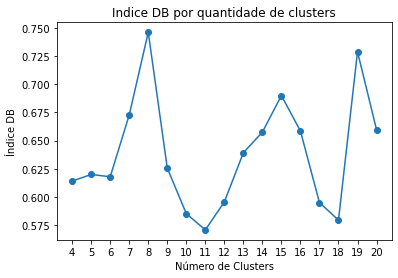

In [26]:
ticks = list(range(4,21))
plt.plot(ticks,lista_db,'-o')
plt.ylabel("Índice DB")
plt.xlabel("Número de Clusters")
plt.title("Indice DB por quantidade de clusters")
plt.xticks(ticks=ticks)
plt.show()

In [37]:
lista_db

[0.6139971288313492,
 0.6198877363707009,
 0.617845095745919,
 0.6726748549256104,
 0.7459929225769028,
 0.6255076240509576,
 0.585139844821399,
 0.5707251503679497,
 0.5955885624001104,
 0.6391360323317664,
 0.6574905869617684,
 0.689847129227664,
 0.6583995146925362,
 0.5949265831367325,
 0.5794272234056913,
 0.7287361213616617,
 0.6595884033012271]

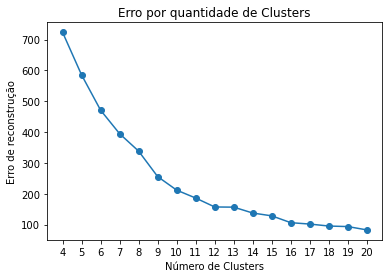

In [28]:
ticks = list(range(4,21))
plt.plot(ticks, lista_inertia_,'-o')
plt.xticks(ticks=ticks)
plt.ylabel("Erro de reconstrução")
plt.xlabel("Número de Clusters")
plt.title("Erro por quantidade de Clusters")
plt.show()

In [38]:
melhor_k = np.argmin(lista_db)+4
kmeans = KMeans(n_clusters= melhor_k, n_init=20,init='random')
kmeans.fit(X_escalado)
y = kmeans.labels_
melhor_centroide = kmeans.cluster_centers_

In [40]:
y

array([6, 1, 1, ..., 0, 1, 0])

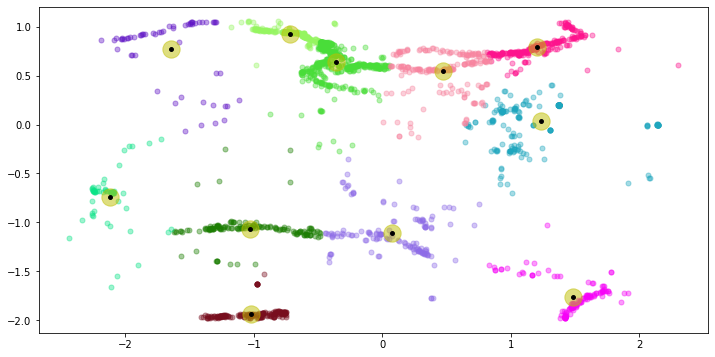

In [43]:
melhor_k = np.argmin(lista_db)+4
kmeans = KMeans(n_clusters= melhor_k, n_init=20,init='random')
kmeans.fit(X_escalado)
y = kmeans.labels_
melhor_centroide = kmeans.cluster_centers_

plt.figure(figsize=(12,6))
for k in range(melhor_k):
    c=np.random.rand(3,)
    plt.scatter(X_escalado[:,0][y==k],X_escalado[:,1][y==k], s=25,alpha=0.4,color=c)
    plt.scatter(melhor_centroide[k,0], melhor_centroide[k,1], s=300, color='y', alpha=0.5)
    plt.scatter(melhor_centroide[k,0], melhor_centroide[k,1], s=15, color='black')
plt.show()